In [1]:
# PROJECT QUESTION: HOW HAS THE NUMBER OF DEATHS BY POLICE SHOOTING INCREASE OR DECREASE OVER FIVE YEARS?
# WHICH STATES,CITY HAVE THE MOST NUMBER OF DEATHS BY POLICE SHOOTING? MAYBE COLLECT DATA ON PERCENTAGE OF AFRICAN AMERICANS 
# FOR EACH STATE. WEALTH INEQUALITY STATISTICS BY STATES. 
# FIND RELATIONSHIP BETWEEN GUN LAWS AND POLICE SHOOTING
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [300]:
df1=pd.read_csv("fatal-police-shootings-data.csv")
df1.head(2)
df1=df1.rename(columns={' ': 'flee'})

In [301]:
#Display the count of what weapons the criminals were carrying
armed=df1.armed.value_counts()
armed


gun                                 2997
knife                                780
unarmed                              318
undetermined                         221
toy weapon                           177
vehicle                              125
unknown weapon                        74
machete                               44
Taser                                 26
ax                                    24
sword                                 21
baseball bat                          18
gun and knife                         17
hammer                                15
sharp object                          13
metal pipe                            12
box cutter                            12
screwdriver                           12
hatchet                               11
gun and car                           11
gun and vehicle                       10
crossbow                               9
shovel                                 6
pipe                                   6
scissors        

In [316]:
#Compute the percentage of different races in deaths by police shootings
race=df1.race.value_counts()
race/sum(df1.race.value_counts())

W    0.504122
B    0.265060
H    0.185584
A    0.019235
N    0.016064
O    0.009934
Name: race, dtype: float64

In [6]:
#Count the number of deaths by police shootings by cities
city=df1.city.value_counts()
city

Los Angeles      83
Phoenix          75
Houston          56
Las Vegas        44
San Antonio      43
                 ..
Grand Prairie     1
Hurricane         1
Jim Thorpe        1
Fort Sumner       1
Magna             1
Name: city, Length: 2447, dtype: int64

In [7]:
#count different threats by criminals that led to police shootings
threat=df1.threat_level.value_counts()
threat

attack          3434
other           1643
undetermined     261
Name: threat_level, dtype: int64

In [8]:
mental=df1.signs_of_mental_illness.value_counts()
mental

False    4143
True     1195
Name: signs_of_mental_illness, dtype: int64

In [9]:
gender=df1.gender.value_counts()
gender

M    5102
F     234
Name: gender, dtype: int64

In [10]:
body_camera=df1.body_camera.value_counts()
body_camera

False    4739
True      599
Name: body_camera, dtype: int64

In [11]:
flee=df1.flee.value_counts()
flee

Not fleeing    3356
Car             889
Foot            684
Other           159
Name: flee, dtype: int64

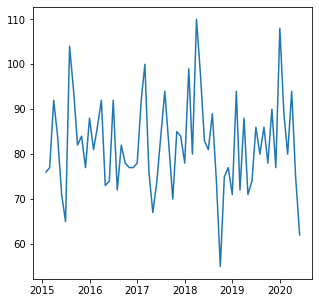

In [12]:
#display how police shoootings changed over time. It is very volatile.
df1.index=pd.to_datetime(df1['date'], format='%m/%d/%Y')
df1.groupby(pd.Grouper(freq='m'))['date'].agg('count')
matplotlib.rcParams["figure.figsize"]=(5,5)
plt.plot(df1.groupby(pd.Grouper(freq='m'))['date'].agg('count'));

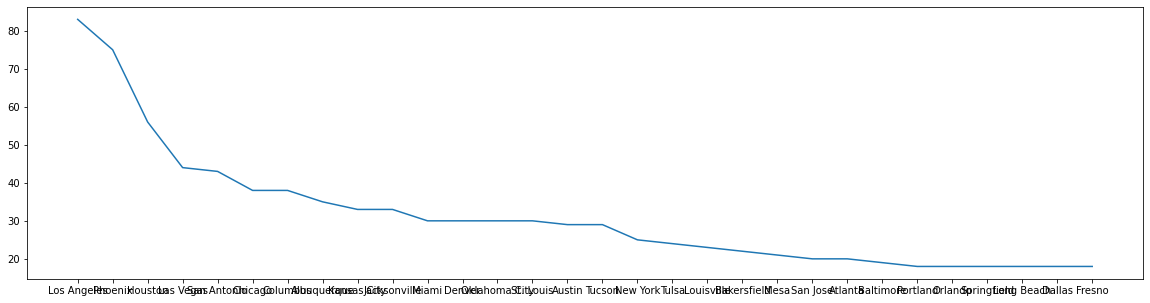

In [13]:
#Plot by cities from most to least police shootings to get a visual sense. 
df1.groupby('city')['city'].agg('count').sort_values(ascending=False).head(30)
matplotlib.rcParams["figure.figsize"]=(20,5)

plt.plot(df1.groupby('city')['city'].agg('count').sort_values(ascending=False).head(30))


In [14]:
#Exclude DC for statewise analysis
df2=pd.DataFrame(df1.groupby('state')['state'].agg('count').sort_values(ascending=False))
df2.columns=['number']
df2=df2.drop(['DC'])
df2.index


Index(['CA', 'TX', 'FL', 'AZ', 'CO', 'GA', 'OK', 'NC', 'OH', 'WA', 'MO', 'TN',
       'LA', 'PA', 'NM', 'IL', 'AL', 'NY', 'VA', 'NV', 'IN', 'KY', 'WI', 'OR',
       'SC', 'AR', 'MD', 'MI', 'MS', 'NJ', 'MN', 'UT', 'WV', 'KS', 'ID', 'AK',
       'MA', 'IA', 'HI', 'MT', 'NE', 'ME', 'CT', 'SD', 'WY', 'DE', 'NH', 'ND',
       'VT', 'RI'],
      dtype='object', name='state')

In [16]:
df3=pd.DataFrame(df2)
df3.index
df4=df3.sort_index(0)
df5=df4[['number']].reset_index(drop=True)





In [17]:
# Now we import data related to gun ownership.
gdf1=pd.read_csv("gun_own.csv")
gdf2=gdf1.sort_values('State')



In [18]:
gdf2.drop(gdf2.columns[1],axis=1,inplace=True)
gdf2=gdf2.reset_index(drop=True)

In [344]:
#Sort by state acronym
statesdf=pd.read_csv("hi.csv")
statesdf=pd.DataFrame(statesdf['Acronym']).reset_index(drop=True)

pdf=pd.concat([gdf2,statesdf],axis='columns',sort='True')
pdf=pdf.sort_values('Acronym',ascending=True).reset_index(drop=True)
#pdf


,State,gunOwnership,totalGuns,Pop,Acronym
0,Alaska,0.617,15824,734002,AK
1,Alabama,0.489,161641,4908621,AL
2,Arkansas,0.579,79841,3038999,AR
3,Arizona,0.323,179738,7378494,AZ
4,California,0.201,344622,39937489,CA
5,Colorado,0.343,92435,5845526,CO
6,Connecticut,0.166,82400,3563077,CT
7,Delaware,0.052,4852,982895,DE
8,Florida,0.325,343288,21992985,FL
9,Georgia,0.316,190050,10736059,GA


In [345]:
pdf=pd.concat([pdf,df5],axis='columns')
#pdf

,State,gunOwnership,totalGuns,Pop,Acronym,number
0,Alaska,0.617,15824,734002,AK,39
1,Alabama,0.489,161641,4908621,AL,102
2,Arkansas,0.579,79841,3038999,AR,80
3,Arizona,0.323,179738,7378494,AZ,251
4,California,0.201,344622,39937489,CA,784
5,Colorado,0.343,92435,5845526,CO,191
6,Connecticut,0.166,82400,3563077,CT,21
7,Delaware,0.052,4852,982895,DE,13
8,Florida,0.325,343288,21992985,FL,344
9,Georgia,0.316,190050,10736059,GA,180


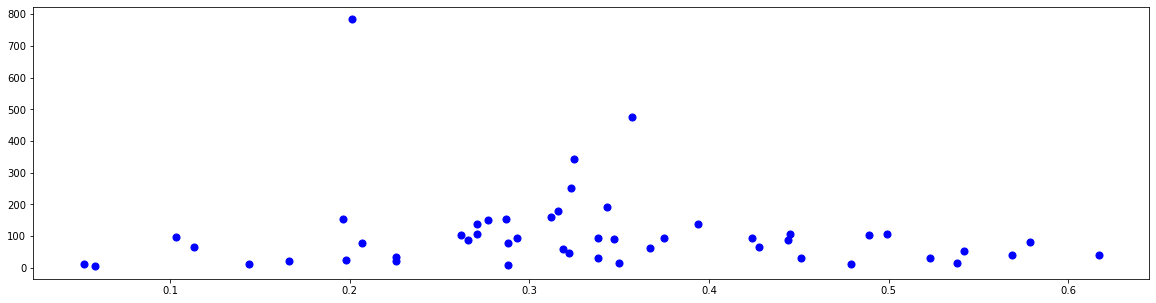

In [21]:
#Number of shootings vs percentage of gun ownership
plt.scatter(pdf.gunOwnership,pdf.number,color='blue',label='gunOwnsership', s=50)

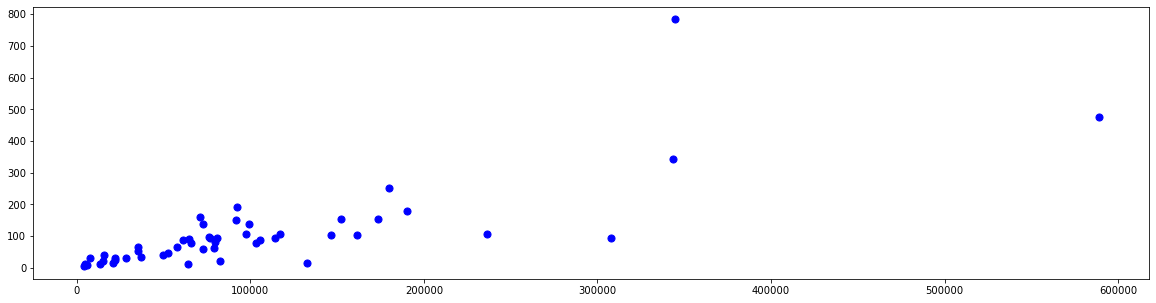

In [22]:
#total number of guns in the state vs number of deaths by police shootings
plt.scatter(pdf.totalGuns,pdf.number,color='blue',label='gunOwnsership', s=50)

In [24]:
#Police shooting / population
pdf1=pdf.copy()
pdf1['killing/pop']=10000*pdf['number']/pdf['Pop']

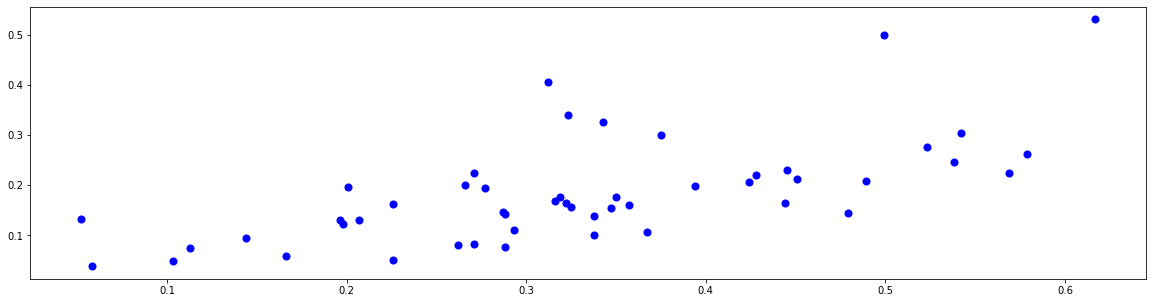

In [25]:
#gun ownership percentage in a state vs police shooting per population
plt.scatter(pdf1.gunOwnership,pdf1['killing/pop'],color='blue',label='gunOwnsership', s=50)

In [26]:
#import gini index by states
gini=pd.read_csv("50_us_states_all_data.csv")
gin1=gini.drop(['Rank'],axis='columns').reset_index(drop=True)


In [27]:
gin2=gin1.sort_values('State').reset_index(drop=True)
gin2=gin2.drop([8]).reset_index(drop=True)
gin3=pd.concat([gin2,statesdf],axis='columns').reset_index(drop=True)
gin4=gin3.sort_values('Acronym').reset_index(drop=True)
gin5=gin4.copy()
#gin5

In [28]:
gin6=gin5.drop(['State','Acronym'],axis='columns').reset_index(drop=True)
#gin6

,Gini Coefficient
0,0.422
1,0.472
2,0.458
3,0.455
4,0.471
5,0.457
6,0.486
7,0.440
8,0.474
9,0.468


In [29]:
pdf3=pd.concat([pdf1,gin6],axis='columns').reset_index(drop=True)
#pdf3.head(50)

,State,gunOwnership,totalGuns,Pop,Acronym,number,killing/pop,Gini Coefficient
0,Alaska,0.617,15824,734002,AK,39,0.531334,0.422
1,Alabama,0.489,161641,4908621,AL,102,0.207798,0.472
2,Arkansas,0.579,79841,3038999,AR,80,0.263245,0.458
3,Arizona,0.323,179738,7378494,AZ,251,0.340178,0.455
4,California,0.201,344622,39937489,CA,784,0.196307,0.471
5,Colorado,0.343,92435,5845526,CO,191,0.326746,0.457
6,Connecticut,0.166,82400,3563077,CT,21,0.058938,0.486
7,Delaware,0.052,4852,982895,DE,13,0.132262,0.440
8,Florida,0.325,343288,21992985,FL,344,0.156414,0.474
9,Georgia,0.316,190050,10736059,GA,180,0.167659,0.468


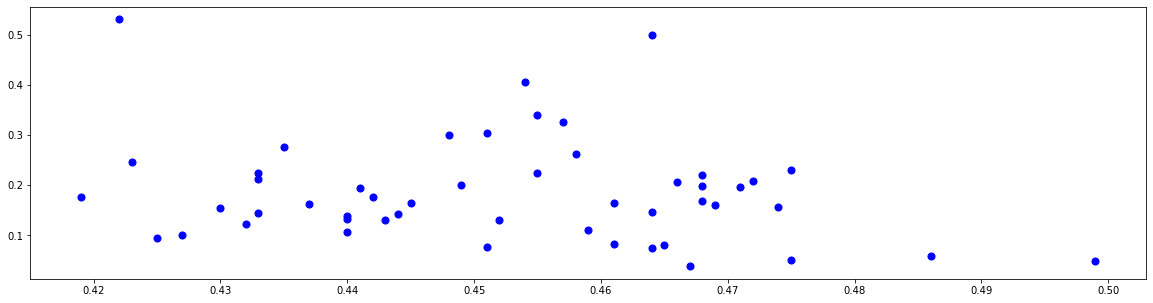

In [30]:
#Gini index by states vs police shooting per population
plt.scatter(pdf3['Gini Coefficient'],pdf1['killing/pop'],color='blue',label='gunOwnsership', s=50)

In [31]:
race=pd.read_csv('race.csv')
#race.head(10)


In [32]:

drop_dex=race.index[race['State'] == 'District of Columbia']
race=race.drop(drop_dex).reset_index(drop=True)

race=race[['State','WhitePerc','BlackPerc','AsianPerc']]
#race

In [33]:
race=pd.concat([race,statesdf], axis='columns',sort='True')
race=race.sort_values('Acronym',ascending=True).reset_index(drop=True)


In [34]:
race=race.drop(['State'],axis='columns').reset_index(drop=True)
race=race.drop(['Acronym'],axis='columns').reset_index(drop=True)


In [35]:
#Create dataframe that shows the demographics of each state
all_things=pd.concat([pdf3,race],axis='columns').reset_index(drop=True)
all_things

,State,gunOwnership,totalGuns,Pop,Acronym,number,killing/pop,Gini Coefficient,WhitePerc,BlackPerc,AsianPerc
0,Alaska,0.617,15824,734002,AK,39,0.531334,0.422,0.6484,0.0327,0.0630
1,Alabama,0.489,161641,4908621,AL,102,0.207798,0.472,0.6819,0.2658,0.0133
2,Arkansas,0.579,79841,3038999,AR,80,0.263245,0.458,0.7700,0.1541,0.0147
3,Arizona,0.323,179738,7378494,AZ,251,0.340178,0.455,0.7722,0.0439,0.0329
4,California,0.201,344622,39937489,CA,784,0.196307,0.471,0.6010,0.0579,0.1432
5,Colorado,0.343,92435,5845526,CO,191,0.326746,0.457,0.8417,0.0412,0.0312
6,Connecticut,0.166,82400,3563077,CT,21,0.058938,0.486,0.7636,0.1056,0.0443
7,Delaware,0.052,4852,982895,DE,13,0.132262,0.440,0.6897,0.2211,0.0387
8,Florida,0.325,343288,21992985,FL,344,0.156414,0.474,0.7539,0.1610,0.0271
9,Georgia,0.316,190050,10736059,GA,180,0.167659,0.468,0.5904,0.3146,0.0391


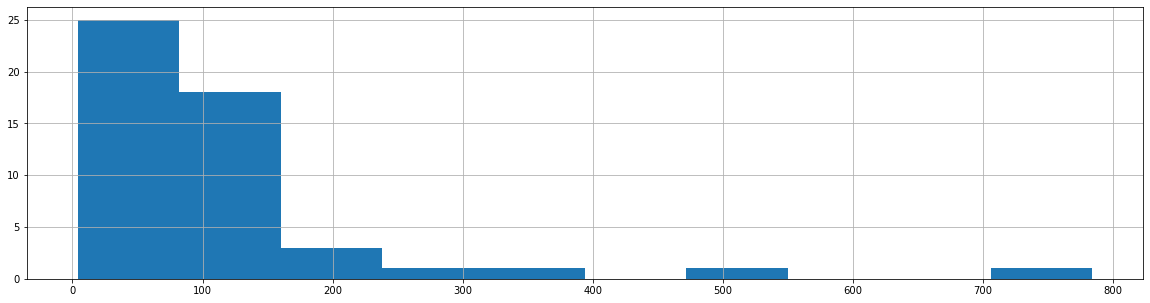

In [36]:
#Histogram of police shootings by states
all_things.number.hist()

In [37]:
all_things.columns

Index(['State', 'gunOwnership', 'totalGuns', 'Pop', 'Acronym', 'number',
       'killing/pop', 'Gini Coefficient', 'WhitePerc', 'BlackPerc',
       'AsianPerc'],
      dtype='object')

In [38]:
#Correlation matrix between below parameters
#Notice that killing/pop and gunownership has high correlation, higher black population percentage/Gini coefficient is negatively correlated to 
#killing/pop
all_things[['gunOwnership','killing/pop','Gini Coefficient','BlackPerc']].corr()

,gunOwnership,killing/pop,Gini Coefficient,BlackPerc
gunOwnership,1.000000,0.646227,-0.251983,-0.085210
killing/pop,0.646227,1.000000,-0.195306,-0.194281
Gini Coefficient,-0.251983,-0.195306,1.000000,0.531053
BlackPerc,-0.085210,-0.194281,0.531053,1.000000


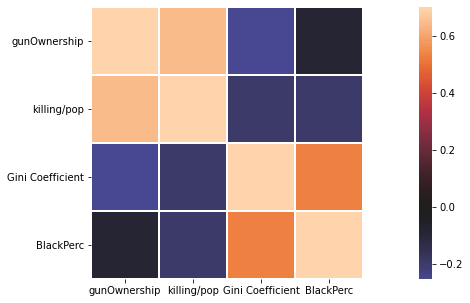

In [39]:
#Heatmap for visualization
sns.heatmap(all_things[['gunOwnership','killing/pop','Gini Coefficient','BlackPerc']].corr(),vmax=0.7, center=0,square=True, linewidths=0.5)

In [40]:
#Begin analysis to find relationship between political tendency to police shootings
poli=pd.read_csv('political.csv')
poli=poli.drop(['Footnotes'],axis='columns').reset_index(drop=True)
poli=pd.concat([poli,statesdf],axis='columns',sort=True)
poli=poli.sort_values('Acronym',ascending=True).reset_index(drop=True)
poli.columns



Index(['Location', 'Governor Political Affiliation',
       'State Senate Majority Political Affiliation',
       'State House Majority Political Affiliation',
       'State Attorney General Political Affiliation', 'Acronym'],
      dtype='object')

In [41]:
#df['job_state']=df.job_state.apply(lambda x:x.strip() if x.strip().lower() != 'los angeles' else 'CA')
#+1 if republican -1 if democratic 0 if anythingelse

import math
poli=poli.fillna('Nothing')
poli['Governor Political Affiliation']=poli['Governor Political Affiliation'].apply(lambda x: 1 if x.lower()=='republican' else (-1 if x.lower() == 'democrat' else 0))
poli['State Senate Majority Political Affiliation']=poli['State Senate Majority Political Affiliation'].apply(lambda x: 1 if x.lower()=='republican' else (-1 if x.lower() == 'democrat' else 0))

poli['State House Majority Political Affiliation']=poli['State House Majority Political Affiliation'].apply(lambda x: 1 if x.lower()=='republican' else (-1 if x.lower() == 'democrat' else 0))
poli['State Attorney General Political Affiliation']=poli['State Attorney General Political Affiliation'].apply(lambda x: 1 if x.lower()=='republican' else (-1 if x.lower() == 'democrat' else 0))

In [42]:
poli['republican_inclination']=poli['Governor Political Affiliation']+poli['State Senate Majority Political Affiliation']+poli['State House Majority Political Affiliation']+poli['State Attorney General Political Affiliation']

In [43]:
poli.head(2)

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,Acronym,republican_inclination
0,Alaska,1,1,1,0,AK,3
1,Alabama,1,1,1,1,AL,4


In [44]:
all_things=pd.concat([all_things,poli['republican_inclination']],axis='columns',sort=True)

In [45]:
#states with higher republican_inclination column are more republican inclined 
all_things

,State,gunOwnership,totalGuns,Pop,Acronym,number,killing/pop,Gini Coefficient,WhitePerc,BlackPerc,AsianPerc,republican_inclination
0,Alaska,0.617,15824,734002,AK,39,0.531334,0.422,0.6484,0.0327,0.0630,3
1,Alabama,0.489,161641,4908621,AL,102,0.207798,0.472,0.6819,0.2658,0.0133,4
2,Arkansas,0.579,79841,3038999,AR,80,0.263245,0.458,0.7700,0.1541,0.0147,4
3,Arizona,0.323,179738,7378494,AZ,251,0.340178,0.455,0.7722,0.0439,0.0329,4
4,California,0.201,344622,39937489,CA,784,0.196307,0.471,0.6010,0.0579,0.1432,-4
5,Colorado,0.343,92435,5845526,CO,191,0.326746,0.457,0.8417,0.0412,0.0312,-4
6,Connecticut,0.166,82400,3563077,CT,21,0.058938,0.486,0.7636,0.1056,0.0443,-4
7,Delaware,0.052,4852,982895,DE,13,0.132262,0.440,0.6897,0.2211,0.0387,-4
8,Florida,0.325,343288,21992985,FL,344,0.156414,0.474,0.7539,0.1610,0.0271,4
9,Georgia,0.316,190050,10736059,GA,180,0.167659,0.468,0.5904,0.3146,0.0391,4


In [46]:
#gun ownership percentage is positively correlated to republican_inclination. Since killing/pop was positively related to gun
#ownership percentage, republican inclination has slight positive correlation with killing/pop
all_things[['gunOwnership','killing/pop','Gini Coefficient','BlackPerc','republican_inclination']].corr()

,gunOwnership,killing/pop,Gini Coefficient,BlackPerc,republican_inclination
gunOwnership,1.000000,0.646227,-0.251983,-0.085210,0.534470
killing/pop,0.646227,1.000000,-0.195306,-0.194281,0.244456
Gini Coefficient,-0.251983,-0.195306,1.000000,0.531053,-0.185841
BlackPerc,-0.085210,-0.194281,0.531053,1.000000,0.104077
republican_inclination,0.534470,0.244456,-0.185841,0.104077,1.000000


In [47]:
all_things.columns

Index(['State', 'gunOwnership', 'totalGuns', 'Pop', 'Acronym', 'number',
       'killing/pop', 'Gini Coefficient', 'WhitePerc', 'BlackPerc',
       'AsianPerc', 'republican_inclination'],
      dtype='object')

In [48]:
model=all_things[['gunOwnership','Pop',
       'killing/pop', 'Gini Coefficient', 'BlackPerc',
        'republican_inclination']]

In [49]:
#Normalize
from sklearn.model_selection import train_test_split
X=model.drop('killing/pop',axis=1)
y=model['killing/pop'].values
X=(X-X.mean())/X.std()
X.head()

,gunOwnership,Pop,Gini Coefficient,BlackPerc,republican_inclination
0,2.113666,-0.785821,-1.693749,-0.763901,0.789070
1,1.167954,-0.227719,1.110471,1.680775,1.092559
2,1.832908,-0.477668,0.325290,0.509302,1.092559
3,-0.058516,0.102477,0.157036,-0.646439,1.092559
4,-0.959898,4.455269,1.054387,-0.499612,-1.335349


In [50]:
#Train, test split (Test Size(20%))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Multi linear regression
import statsmodels.api as sm
from statsmodels.api import add_constant
X_sm=X=sm.add_constant(X)
model=sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     7.144
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           5.74e-05
Time:                        20:38:00   Log-Likelihood:                 57.245
No. Observations:                  50   AIC:                            -102.5
Df Residuals:                      44   BIC:                            -91.02
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1863      0.012     16.044      0.000       0.163       0.210
gunOwnership               0.0726      0.015      4.998      0.000       0.043       0.102
Pop                       -0.0035      0.014     -0.249      0.804      -0.032       0.025
Gini Coefficient           0.0058      0.016      0.353      0.726      -0.027       0.039
BlackPerc                 -0.0154      0.014     -1.069      0.291      -0.045       0.014
republican_inclination    -0.0108      0.015     -0.747      0.459      -0.040       0.018
==============================================================================
Omnibus:                       14.100   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.218
Skew:                           1.182   Prob(JB):                     0.000496
Kurtosis:                       4.311   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
lm.fit(X_train,y_train)
cross_val_score(lm,X_train,y_train,scoring= 'neg_mean_absolute_error',cv=3)


array([-0.06564858, -0.10044429, -0.08418036])

In [53]:
tpred_lm = lm.predict(X_test)
tpred_lm

array([0.15889746, 0.21094335, 0.07925649, 0.1880746 , 0.213997  ,
       0.30639062, 0.14766587, 0.29997223, 0.22563708, 0.08487495])

In [54]:
X_test

,gunOwnership,Pop,Gini Coefficient,BlackPerc,republican_inclination
13,-0.509207,0.808515,0.717881,0.385548,-1.335349
39,0.835477,-0.187415,0.493543,1.727970,1.092559
30,-1.610075,0.310775,0.661796,0.305841,-1.031861
45,-0.317109,-0.799985,-0.459892,-0.971557,-0.728372
17,0.842866,-0.262938,1.278725,2.273328,0.485582
48,1.559538,-0.646241,-0.067301,-0.724048,1.092559
26,-0.324497,0.534744,0.661796,1.143806,-0.121395
25,1.419159,-0.738662,-0.964652,-1.060702,0.485582
32,0.325680,-0.464211,-0.235555,-0.170299,-1.335349
19,-0.915567,-0.070702,-0.515977,2.016380,-0.728372


In [55]:
#import data on police deaths by states
pol_death=pd.read_csv('police_deaths_538.csv')
pol_death=pol_death[pol_death.year>2010]
year=pol_death.year.value_counts()
x=pol_death.groupby('state')['state'].agg('count')
x=pd.DataFrame(x)
x = x.rename(lambda x: x.replace(' ',''))
x=x.drop(index=['DC','US','GU','PR','TR','VI']).reset_index(drop=True)
x.size

x=x.rename(columns={"state": "pol_death"})
all_things=pd.concat([all_things,x['pol_death']],axis='columns',sort=True).reset_index(drop=True)
all_things


,State,gunOwnership,totalGuns,Pop,Acronym,number,killing/pop,Gini Coefficient,WhitePerc,BlackPerc,AsianPerc,republican_inclination,pol_death
0,Alaska,0.617,15824,734002,AK,39,0.531334,0.422,0.6484,0.0327,0.0630,3,4
1,Alabama,0.489,161641,4908621,AL,102,0.207798,0.472,0.6819,0.2658,0.0133,4,18
2,Arkansas,0.579,79841,3038999,AR,80,0.263245,0.458,0.7700,0.1541,0.0147,4,11
3,Arizona,0.323,179738,7378494,AZ,251,0.340178,0.455,0.7722,0.0439,0.0329,4,13
4,California,0.201,344622,39937489,CA,784,0.196307,0.471,0.6010,0.0579,0.1432,-4,56
5,Colorado,0.343,92435,5845526,CO,191,0.326746,0.457,0.8417,0.0412,0.0312,-4,19
6,Connecticut,0.166,82400,3563077,CT,21,0.058938,0.486,0.7636,0.1056,0.0443,-4,3
7,Delaware,0.052,4852,982895,DE,13,0.132262,0.440,0.6897,0.2211,0.0387,-4,1
8,Florida,0.325,343288,21992985,FL,344,0.156414,0.474,0.7539,0.1610,0.0271,4,41
9,Georgia,0.316,190050,10736059,GA,180,0.167659,0.468,0.5904,0.3146,0.0391,4,41


In [56]:
#higher black population percentage and gini coeffients showed positive correlation to police deaths
all_things[['gunOwnership','killing/pop','Gini Coefficient','BlackPerc','republican_inclination','pol_death']].corr()

,gunOwnership,killing/pop,Gini Coefficient,BlackPerc,republican_inclination,pol_death
gunOwnership,1.000000,0.646227,-0.251983,-0.085210,0.534470,-0.204744
killing/pop,0.646227,1.000000,-0.195306,-0.194281,0.244456,-0.178784
Gini Coefficient,-0.251983,-0.195306,1.000000,0.531053,-0.185841,0.628132
BlackPerc,-0.085210,-0.194281,0.531053,1.000000,0.104077,0.394836
republican_inclination,0.534470,0.244456,-0.185841,0.104077,1.000000,0.012092
pol_death,-0.204744,-0.178784,0.628132,0.394836,0.012092,1.000000


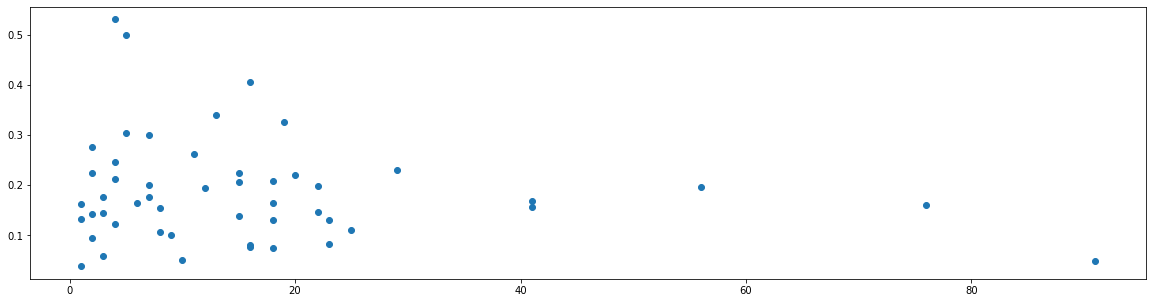

In [161]:
#plot police deaths vs killing/pop
plt.scatter(all_things['pol_death'],all_things['killing/pop'])

In [230]:

import glob

path = r'C:\Users\JHU_O\Desktop\police shooting project' # use your path
all_files = glob.glob(path + "/ucrAgeAge*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

#pd.set_option('display.max_rows', None)

frame = pd.concat(li, axis=0, ignore_index=True)


,Offenses,All races,White,Black,American Indian,Asian
0,All offenses,"10,797,090","7,531,830","2,875,140","227,240","162,880"
1,Murder and nonnegligent manslaughter,"11,090","5,090","5,670",130,200
2,Rape,NaN,NaN,NaN,NaN,NaN
3,Robbery,"95,570","42,460","51,110",740,"1,270"
4,Aggravated assault,"376,150","240,710","120,660","7,630","7,150"
5,Burglary,"216,010","147,070","63,660","2,190","3,080"
6,Larceny-theft,"1,160,390","807,010","317,800","18,580","17,000"
7,Motor vehicle theft,"77,980","52,390","22,920","1,200","1,460"
8,Arson,"8,830","6,470","1,980",230,150
9,Simple assault,"1,081,020","712,280","332,850","19,660","16,220"


In [234]:
#data on violent crimes and all offenses by race
crime_vc = frame.loc[frame['Offenses'] == 'Violent crimes*' ]
crime_all= frame.loc[frame['Offenses'] == 'All offenses' ]
frames = [crime_vc, crime_all]
crime = pd.concat(frames)
crime.reset_index()


,index,Offenses,All races,White,Black,American Indian,Asian
0,30,Violent crimes*,"482,820","288,260","177,430","8,500","8,620"
1,71,Violent crimes*,"491,520","287,830","186,250","9,000","8,440"
2,112,Violent crimes*,"495,180","287,830","187,840","10,670","8,840"
3,153,Violent crimes*,"495,900","288,620","187,470","9,980","9,830"
4,0,All offenses,"10,797,090","7,531,830","2,875,140","227,240","162,880"
5,41,All offenses,"10,662,250","7,418,700","2,863,810","216,530","163,210"
6,82,All offenses,"10,554,990","7,277,670","2,870,440","254,080","152,800"
7,123,All offenses,"10,310,960","7,115,940","2,826,460","219,410","149,150"


In [272]:
Year=['2015','2016','2017','2018','2015','2016','2017','2018']
crime['Year']=Year
crime[crime.columns[1:7]]
crime_1 = crime[crime.columns[1:7]].applymap(lambda x: x.replace(',', ''))

crime_1


,All races,White,Black,American Indian,Asian,Year
30,482820,288260,177430,8500,8620,2015
71,491520,287830,186250,9000,8440,2016
112,495180,287830,187840,10670,8840,2017
153,495900,288620,187470,9980,9830,2018
0,10797090,7531830,2875140,227240,162880,2015
41,10662250,7418700,2863810,216530,163210,2016
82,10554990,7277670,2870440,254080,152800,2017
123,10310960,7115940,2826460,219410,149150,2018


In [279]:
crime_2=crime_1.astype(float)
crime_2[crime_1.columns[1:5]]
crime_2=100*crime_2[crime_2.columns[1:5]].div(crime_2['All races'], axis=0)
crime_2.insert(0, "Offenses", crime['Offenses']) 
crime_2.insert(1, "Year", crime_1['Year']) 
crime_2=crime_2.sort_values(by=['Year'])

In [280]:
crime_2

,Offenses,Year,White,Black,American Indian,Asian
30,Violent crimes*,2015,59.703409,36.748685,1.760490,1.785344
0,All offenses,2015,69.757963,26.628842,2.104641,1.508555
71,Violent crimes*,2016,58.559163,37.892660,1.831055,1.717122
41,All offenses,2016,69.579123,26.859340,2.030810,1.530728
112,Violent crimes*,2017,58.126338,37.933681,2.154772,1.785209
82,All offenses,2017,68.950042,27.195099,2.407203,1.447657
153,Violent crimes*,2018,58.201250,37.803993,2.012503,1.982254
123,All offenses,2018,69.013361,27.412191,2.127930,1.446519


In [297]:

#Now compare this with entire population percentage.
#We see that black crime percentage/black population percentage is the highest.
W_crime_percentage=crime_2[crime_2['Offenses']=='Violent crimes*'].White.mean()
B_crime_percentage=crime_2[crime_2['Offenses']=='Violent crimes*'].Black.mean()
AI_crime_percentage=crime_2[crime_2['Offenses']=='Violent crimes*']['American Indian'].mean()
A_crime_percentage=crime_2[crime_2['Offenses']=='Violent crimes*'].Asian.mean()
W_percentage=76.3
B_percentage=13.4
AI_percentage=1.3
A_percentage=5.9
data = {'Wcp/Wp':  [W_crime_percentage/W_percentage],
        'Bcp/Bp': [B_crime_percentage/B_percentage],
        'AIcp/AIp': [AI_crime_percentage/AI_percentage],
        'Acp/Ap': [A_crime_percentage/A_percentage]
        }

df = pd.DataFrame (data, columns = ['Wcp/Wp','Bcp/Bp','AIcp/AIp','Acp/Ap'])

df

,Wcp/Wp,Bcp/Bp,AIcp/AIp,Acp/Ap
0,0.768644,2.805579,1.492081,0.308048


In [328]:
#Compare this with police shooting death percentage
race=df1.race.value_counts()
police_kill_race=race/sum(df1.race.value_counts())
police_kill_race


W    0.504122
B    0.265060
H    0.185584
A    0.019235
N    0.016064
O    0.009934
Name: race, dtype: float64

In [336]:

policekill_race_data = {'W':  [police_kill_race[0]+police_kill_race[2]],
        'B': [police_kill_race[1]],
        'A': [police_kill_race[3]],
        'AI': [police_kill_race[4]]
        }

prd = pd.DataFrame (policekill_race_data, columns = ['W','B','A','AI'])
prd



,W,B,A,AI
0,0.689706,0.26506,0.019235,0.016064


In [343]:
#policekill  deathrace/violentcrimerace
pkr_vcr = {'W':  [100*prd['W'][0]/W_crime_percentage],
        'B':  [100*prd['B'][0]/B_crime_percentage],
        'A':  [100*prd['A'][0]/A_crime_percentage],
        'AI':  [100*prd['AI'][0]/AI_crime_percentage]
        }

pkr_vcr = pd.DataFrame (pkr_vcr, columns = ['W','B','A','AI'])
pkr_vcr
#This informations tells us that compared to the percentage of violent crimes white people get shot the most while 
#black people are shot the least. 


,W,B,A,AI
0,1.176019,0.705046,1.058323,0.82818
